# Open Data Madrid

Nos gustaría conocer como podemos explotar datos de distinto tipo para la comunidad de Madrid:

* Datos de tráfico: https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=02f2c23866b93410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD
* Datos Geolocalizados: https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=23d57fa19bfa7410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD
* Datos fijos: https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=ee941ce6ba6d3410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD
* Datos relacionados: https://datos.madrid.es/sites/v/index.jsp?vgnextoid=255e0ff725b93410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD

Seguro que además de esto podemos encontrar datos relativos a renta per cápita en distintas regiones de la ciudad, actividades planteadas en la agenda de eventos,... la imaginación al poder!

## DATOS DE TRAFICO

In [1]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [33]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import os
import matplotlib.pyplot as plt
import geopandas as gpd

In [16]:
url = 'https://datos.madrid.es/egob/catalogo/202087-0-trafico-intensidad.xml'
response = requests.get(url)
xml_data = response.content


In [17]:
response

<Response [200]>

In [18]:
response.content

b'\xef\xbb\xbf<pms>\r\n  <fecha_hora>03/06/2024 20:10:12</fecha_hora>\r\n  <pm>\r\n    <idelem>4739</idelem>\r\n    <descripcion>CJAL. FCO. J. JIMENEZ \xc3\x98126 E-O (BERLANAS-SEPULVEDA)</descripcion>\r\n    <accesoAsociado>240101</accesoAsociado>\r\n    <intensidad>508</intensidad>\r\n    <ocupacion>7</ocupacion>\r\n    <carga>39</carga>\r\n    <nivelServicio>1</nivelServicio>\r\n    <intensidadSat>1500</intensidadSat>\r\n    <error>N</error>\r\n    <subarea>1718</subarea>\r\n    <st_x>436039,137988103</st_x>\r\n    <st_y>4472395,05226989</st_y>\r\n  </pm>\r\n  <pm>\r\n    <idelem>4740</idelem>\r\n    <descripcion>CJAL. FCO. J. JIMENEZ \xc3\x9886 O-E (F. CALVO-ALHAMBRA)</descripcion>\r\n    <accesoAsociado>240604</accesoAsociado>\r\n    <intensidad>160</intensidad>\r\n    <ocupacion>2</ocupacion>\r\n    <carga>12</carga>\r\n    <nivelServicio>0</nivelServicio>\r\n    <intensidadSat>1500</intensidadSat>\r\n    <error>N</error>\r\n    <subarea>1712</subarea>\r\n    <st_x>436730,4516191

In [22]:
# Parsear el archivo XML
root = ET.fromstring(xml_data)

# Extraer datos relevantes
data = []
for elem in root.findall('.//pm'):
    data.append({
        'idelem': elem.find('idelem').text,
        'intensidad': elem.find('intensidad').text,
        'ocupacion': elem.find('ocupacion').text,
        'carga': elem.find('carga').text,
    })


In [23]:
df = pd.DataFrame(data)
df

,idelem,intensidad,ocupacion,carga
0,4739,508,7,39
1,4740,160,2,12
2,4741,200,0,13
3,4742,240,15,21
4,4743,320,2,12
...,...,...,...,...
4778,6786,1200,13,90
4779,6785,1380,7,43
4780,6807,2400,13,71
4781,6808,0,0,0


In [24]:
df.info

<bound method DataFrame.info of      idelem intensidad ocupacion carga
0      4739        508         7    39
1      4740        160         2    12
2      4741        200         0    13
3      4742        240        15    21
4      4743        320         2    12
...     ...        ...       ...   ...
4778   6786       1200        13    90
4779   6785       1380         7    43
4780   6807       2400        13    71
4781   6808          0         0     0
4782   6711       2400        13    71

[4783 rows x 4 columns]>

In [25]:
df.describe

<bound method NDFrame.describe of      idelem intensidad ocupacion carga
0      4739        508         7    39
1      4740        160         2    12
2      4741        200         0    13
3      4742        240        15    21
4      4743        320         2    12
...     ...        ...       ...   ...
4778   6786       1200        13    90
4779   6785       1380         7    43
4780   6807       2400        13    71
4781   6808          0         0     0
4782   6711       2400        13    71

[4783 rows x 4 columns]>

In [26]:
# Obtener el directorio actual
current_dir = os.getcwd()

# Guardar el DataFrame en un archivo CSV en el directorio actual
csv_file_path = os.path.join(current_dir, 'trafico_intensidad.csv')
df.to_csv(csv_file_path, index=False)

In [27]:
print(df.head())

  idelem intensidad ocupacion carga
0   4739        508         7    39
1   4740        160         2    12
2   4741        200         0    13
3   4742        240        15    21
4   4743        320         2    12


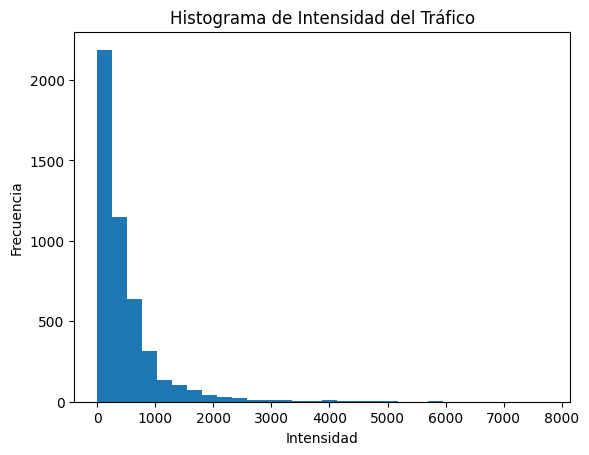

In [30]:
# Convertir 'intensidad' a numérico para la visualización
df['intensidad'] = pd.to_numeric(df['intensidad'], errors='coerce')

# Histograma de la intensidad del tráfico
df['intensidad'].plot(kind='hist', bins=30, title='Histograma de Intensidad del Tráfico')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.show()

## DATOS GELOCALIZADOS

In [31]:
# URL del archivo KML
url = 'https://datos.madrid.es/egob/catalogo/202087-0-trafico-intensidad.kml'

# Descargar el archivo KML
response = requests.get(url)

# Guardar el archivo KML localmente
kml_file_path = 'trafico_intensidad.kml'
with open(kml_file_path, 'wb') as file:
    file.write(response.content)

print(f'Archivo KML guardado en: {kml_file_path}')

Archivo KML guardado en: trafico_intensidad.kml


In [49]:
# Ruta del archivo KML descargado
# kml_file_path = './INTENS_POLIG.kml'
kml_file_path = './trafico_intensidad.kml'


In [50]:
gdf = gpd.read_file(kml_file_path, driver='OGR')



DriverError: ERROR parsing kml ./trafico_intensidad.kml :Invalid root element

In [48]:

# Convertir a DataFrame de Pandas
df = pd.DataFrame(gdf)


NameError: name 'gdf' is not defined

In [ ]:

# Guardar el DataFrame en un archivo CSV
csv_file_path = 'trafico_intensidad_2.csv'
df.to_csv(csv_file_path, index=False)

# Mostrar las primeras filas del DataFrame
print(df.head())

## DATOS FIJOS